In [14]:
!pip install HydroErr
import HydroErr as HEEM
import numpy 
import pandas as pd
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error
from keras.layers import BatchNormalization, Dropout
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
AI_Method = "/content/gdrive/My Drive/Colab Notebooks/Nal7/12188MT-1-LSTM-SSA-Gini-1b-Sil"
Var_LRs=[1e-2]# 1e-4,1e-5,1e-6,1e-7,1e-8,1e-9
Var_Decays=[1e-4] # 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9
Var_epochs=[100] # 100,500,1000,1500,2000
 
Streamflow=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/12188MT-1SSA-1.csv', delimiter=',')

In [16]:
import numpy as np
x= Streamflow.drop('Q',axis=1)
Y= Streamflow['Q']
x= x.drop('Wind',axis=1)
 
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q-1     237 non-null    float64
 1   Q-2     237 non-null    float64
 2   Q-3     237 non-null    float64
 3   MTI     237 non-null    int64  
 4   Prep    237 non-null    float64
 5   Humid   237 non-null    float64
 6   Temp    237 non-null    float64
 7   MeanQ   237 non-null    float64
 8   Comp0   237 non-null    float64
 9   Cemp1   237 non-null    float64
 10  Comp2   237 non-null    float64
 11  Comp3   237 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 22.3 KB


In [17]:
X=np.array(x)
y=np.array(Y)
print (X.shape[1])

12


In [18]:
test_size = int(len(X) * 0.15)
valid_size = int(len(X) * 0.15)
train_size= len(X) - (valid_size+test_size)
y_train, y_valid, y_test = y[0:train_size], y[train_size:train_size+valid_size], y[-test_size:]
X_train, X_valid, X_test = X[0:train_size], X[train_size:train_size+valid_size], X[train_size+valid_size:]
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_valid = numpy.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input=X_train[1:]
input_shape=X_train.shape[1:]

In [19]:
print (y_train.shape, y_valid.shape, y_test.shape)

(167,) (35,) (35,)


In [20]:
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as geek

In [21]:
#def create_NN():
model = Sequential()
model.add(LSTM(200, input_shape=X_train.shape[1:], activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1, activation='relu'))

In [22]:
startTime = datetime.now()
fileOfSummary = open(AI_Method+'_Summary_'+str(datetime.now()).replace(":", ".")+'.csv', "w")
fileOfSummary.write("Method,LR,DE,Epoch,RunTime,CCTr,CCVd,CCTt,NSTr,NSVd,NSTt,WITr,WIVd,WITt,RMSETr,RMSEVd,RMSETt,MAETr,MAEVd,MAETt"+str(X.shape[1])+"\n")

113

In [23]:
for e_LR in Var_LRs:
    for e_decay in Var_Decays:
        for e_epoch in Var_epochs:
            
            optimizer = keras.optimizers.Adam(lr=e_LR, decay=e_decay)
            model.compile(optimizer=optimizer,loss='mean_squared_error')
        
            print(" ")
            print(" ")
            print("LRs:",e_LR)
            print("Decays:",e_decay)
            print("epochs:",e_epoch)
            history = model.fit(X_train, y_train, epochs=e_epoch, batch_size=256, verbose=0, validation_data=(X_valid, y_valid), shuffle=True)

            hist_df = pd.DataFrame(history.history) 
            Time_elasped= datetime.now() - startTime
            print('\nTime elapsed: ', Time_elasped)
 
            Train = model.predict(X_train)
            Valid = model.predict(X_valid)
            Test = model.predict(X_test)
 
            FileName=AI_Method+'-LR'+str(e_LR)+'-DE'+str(e_decay)+'-'+str(e_epoch)
            np.savetxt(FileName+'_Train.csv', Train)
            np.savetxt(FileName+'_Valid.csv', Valid)
            np.savetxt(FileName+'_Test.csv', Test)
            
            Train = geek.asarray(Train)
            Valid = geek.asarray(Valid)
            Test = geek.asarray(Test)
 
            Train = Train.reshape(Train.shape[0])
            Valid = Valid.reshape(Valid.shape[0])
            Test = Test.reshape(Test.shape[0])
 
            print(" ")
            print("LRs:",e_LR)
            print("Decays:",e_decay)
            print("epochs:",e_epoch)
            
            print("Train ==>")
            CC_Train=np.corrcoef(y_train,Train)
            print("CC_Train = %.3f" %CC_Train[0,1])
 
            NSTr=HEEM.nse(Train, y_train) 
            print("NSTr = %.2f" %NSTr)

            WITr=HEEM.d(Train, y_train)   
            print("WITr = %.2f" %WITr)

            rootMeanSquaredErrorTr = sqrt(mean_squared_error(y_train, Train))
            print("RMSE = %.2f" % rootMeanSquaredErrorTr)
            MAETr=mean_absolute_error(y_train, Train)
            print("MAE = %.2f" %  MAETr)
 
            print("Validation ===============>")
            CC_Valid=np.corrcoef(y_valid,Valid)
            print("CC_Test = %.3f" %CC_Valid[0,1])
 
            NSVd=HEEM.nse(Valid, y_valid)
            print("NSTt = %.2f" %NSVd)
 
            WIVd=HEEM.d(Valid, y_valid)
            print("WITr = %.2f" %WITr)

            rootMeanSquaredErrorVd = sqrt(mean_squared_error(y_valid, Valid))
            print("RMSE = %.2f" % rootMeanSquaredErrorVd)
            MAEVd=mean_absolute_error(y_valid, Valid)
            print("MAE = %.2f" %  MAEVd)

            print("Test ======================>")
            CC_Test=np.corrcoef(y_test,Test)
            print("CC_Test = %.3f" %CC_Test[0,1])
 
            NSTt=HEEM.nse(Test, y_test)
            print("NSTt = %.2f" %NSTt)
 
            WITt=HEEM.d(Test, y_test) 
            print("WITr = %.2f" %WITr)

            rootMeanSquaredErrorTt = sqrt(mean_squared_error(y_test, Test))
            print("RMSE = %.2f" % rootMeanSquaredErrorTt)
            MAETt=mean_absolute_error(y_test, Test)
            print("MAE = %.2f" %  MAETt)
 
            fileOfSummary.write(AI_Method+','+str(e_LR)+','+str(e_decay)+','+str(e_epoch)+','+str(Time_elasped)+','
              +str(CC_Train[0,1])+','+str(CC_Valid[0,1])+','+str(CC_Test[0,1])+','
              +str(NSTr)+','+str(NSVd)+','+str(NSTt)+','
              +str(WITr)+','+str(WIVd)+','+str(WITt)+','
              +str(rootMeanSquaredErrorTr)+','+str(rootMeanSquaredErrorVd)+','+str(rootMeanSquaredErrorTt)+','
              +str(MAETr)+','+str(MAEVd)+','+str(MAETt)+'\n')

 
 
LRs: 0.01
Decays: 0.0001
epochs: 100

Time elapsed:  0:00:09.924150
 
LRs: 0.01
Decays: 0.0001
epochs: 100
Train ==>
CC_Train = 0.934
NSTr = 0.83
WITr = 0.94
RMSE = 0.97
MAE = 0.53
Validation ===============>
CC_Test = 0.914
NSTt = 0.73
WITr = 0.94
RMSE = 1.02
MAE = 0.66
Test ======================>
CC_Test = 0.897
NSTt = 0.79
WITr = 0.94
RMSE = 0.66
MAE = 0.44


In [24]:
import io
buf = io.StringIO()
x.info(buf=buf)
s = buf.getvalue()

fileOfSummary.write(s)
fileOfSummary.close()

print("Finished")

Finished


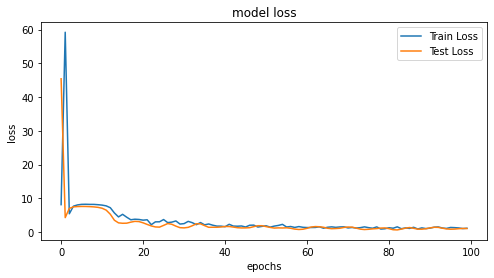

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();